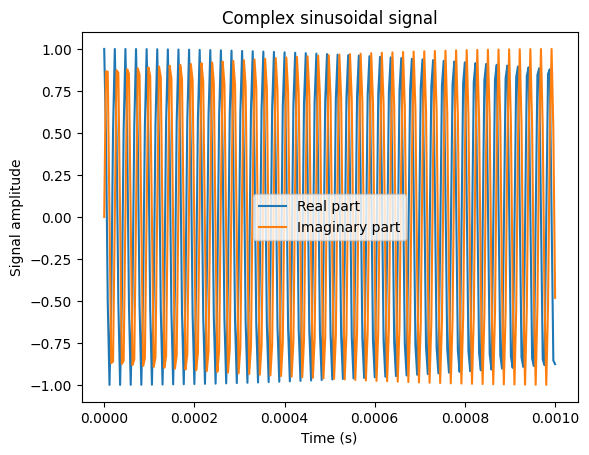

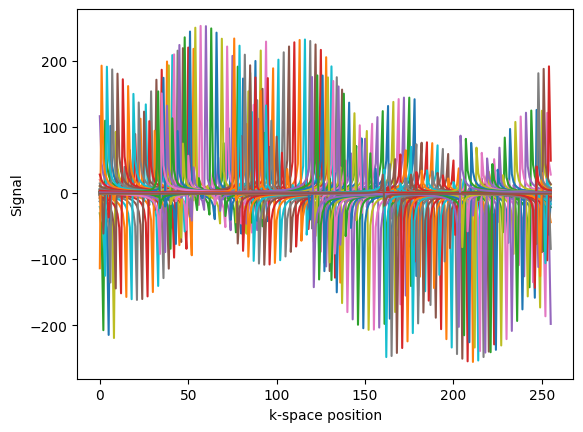

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft # type: ignore

# Define some constants
N = 256  # Number of spins (and number of points in k-space)
gamma = 42.58e6  # Gyromagnetic ratio for hydrogen in Hz/T
G = 1e-3  # Gradient strength in T/m

# Generate the signal
# For simplicity, let's assume the signal is a complex sinusoidal signal
# This would correspond to a single-frequency signal, i.e., all spins are precessing at the same frequency
t = np.linspace(0, 1e-3, N)  # Time points in seconds
signal = np.exp(1j * 2 * np.pi * gamma * G * t)  # Complex sinusoidal signal

# Plot the signal
plt.plot(t, np.real(signal), label='Real part')
plt.plot(t, np.imag(signal), label='Imaginary part')
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.title('Complex sinusoidal signal')
plt.legend()
plt.show()

# Apply the gradient
# We'll assume the gradient is applied in the x direction
# The effect of the gradient is to cause the spins to precess at different frequencies depending on their position
# In 1D, this is equivalent to simply multiplying the signal by a linear phase ramp
x = np.linspace(-N/2, N/2, N)  # Positions in meters
signal_grad = signal * np.exp(-1j * 2 * np.pi * gamma * G * x * t[:, None])

# Now we can Fourier transform the signal to generate the k-space line
k_space_line = fft(signal_grad, axis=0)

# Let's plot the real part of the k-space line
plt.figure()
plt.plot(np.real(k_space_line))
plt.xlabel('k-space position')
plt.ylabel('Signal')
plt.show()


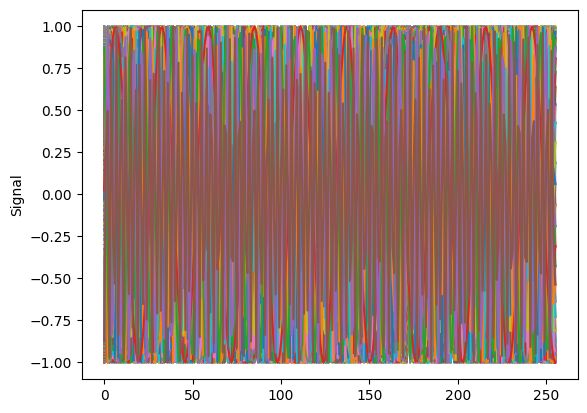

In [6]:
import numpy as np
from numpy.fft import ifft

# Take the inverse Fourier transform to generate the signal in real space
signal_real = np.real(ifft(k_space_line, axis=0))

plt.figure()
plt.plot(np.real(signal_real))
plt.ylabel('Signal')
plt.show()
